In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.pandas.set_option("display.max_columns",None)

In [2]:
df = pd.read_excel("ENB2012_data.xlsx")

In [3]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [11]:
df.rename(columns={'X1':"Relative Compactness",'X2':"Surface Area",'X3':"Wall Area",'X4':"Roof Area",'X5':"Overall Height",'X6':"Orientation",'X7':"Glazing Area",'X8':"Glazing Area Distribution",'Y1':"Heating Load",'Y2':"Cooling Load"},inplace=True)

In [12]:
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative Compactness       768 non-null    float64
 1   Surface Area               768 non-null    float64
 2   Wall Area                  768 non-null    float64
 3   Roof Area                  768 non-null    float64
 4   Overall Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing Area               768 non-null    float64
 7   Glazing Area Distribution  768 non-null    int64  
 8   Heating Load               768 non-null    float64
 9   Cooling Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [14]:
df.shape

(768, 10)

In [22]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [29]:
df.dtypes

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [12]:
# Checking for Missing Values

In [15]:
df.isnull().sum()

Relative Compactness         0
Surface Area                 0
Wall Area                    0
Roof Area                    0
Overall Height               0
Orientation                  0
Glazing Area                 0
Glazing Area Distribution    0
Heating Load                 0
Cooling Load                 0
dtype: int64

In [16]:
for i in df.columns:
    x = [i,list(df[i].value_counts())]
    print(x)

['Relative Compactness', [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]]
['Surface Area', [64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]]
['Wall Area', [192, 192, 128, 64, 64, 64, 64]]
['Roof Area', [384, 192, 128, 64]]
['Overall Height', [384, 384]]
['Orientation', [192, 192, 192, 192]]
['Glazing Area', [240, 240, 240, 48]]
['Glazing Area Distribution', [144, 144, 144, 144, 144, 48]]
['Heating Load', [6, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [98]:
for i in df.columns:
    x = [i,list(df[i].unique())]
    print(x)

['Relative Compactness', [0.98, 0.9, 0.86, 0.82, 0.79, 0.76, 0.74, 0.71, 0.69, 0.66, 0.64, 0.62]]
['Surface Area', [514.5, 563.5, 588.0, 612.5, 637.0, 661.5, 686.0, 710.5, 735.0, 759.5, 784.0, 808.5]]
['Wall Area', [294.0, 318.5, 343.0, 416.5, 245.0, 269.5, 367.5]]
['Roof Area', [110.25, 122.5, 147.0, 220.5]]
['Overall Height', [7.0, 3.5]]
['Orientation', [2, 3, 4, 5]]
['Glazing Area', [0.0, 0.1, 0.25, 0.4]]
['Glazing Area Distribution', [0, 1, 2, 3, 4, 5]]
['Heating Load', [15.55, 20.84, 21.46, 20.71, 19.68, 19.5, 19.95, 19.34, 18.31, 17.05, 17.41, 16.95, 15.98, 28.52, 29.9, 29.63, 28.75, 24.77, 23.93, 6.07, 6.05, 6.01, 6.04, 6.37, 6.4, 6.366, 6.85, 6.79, 6.77, 6.81, 7.18, 7.1, 10.85, 10.54, 10.77, 10.56, 8.6, 8.49, 8.45, 8.5, 24.58, 24.63, 24.59, 29.03, 29.87, 29.14, 28.09, 26.28, 26.91, 26.37, 25.27, 23.53, 24.03, 23.54, 22.58, 35.56, 37.12, 36.9, 35.94, 32.96, 32.12, 32.94, 32.21, 10.36, 10.43, 10.39, 10.71, 10.8, 10.7, 10.75, 11.11, 11.13, 11.09, 11.16, 11.68, 11.69, 11.7, 15.41, 

<AxesSubplot:>

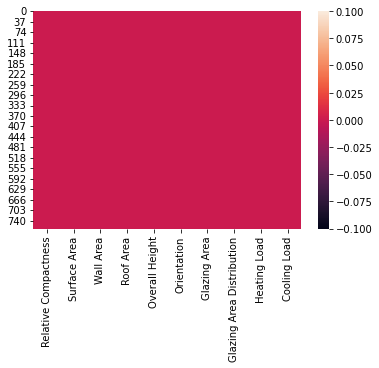

In [17]:
sns.heatmap(df.isnull())

##### Observation: There are no Null or NAN Values

##### Checking for Outliers

In [71]:
df.columns

Index(['Relative Compactness', 'Surface Area', 'Wall Area', 'Roof Area',
       'Overall Height', 'Orientation', 'Glazing Area',
       'Glazing Area Distribution', 'Heating Load', 'Cooling Load'],
      dtype='object')

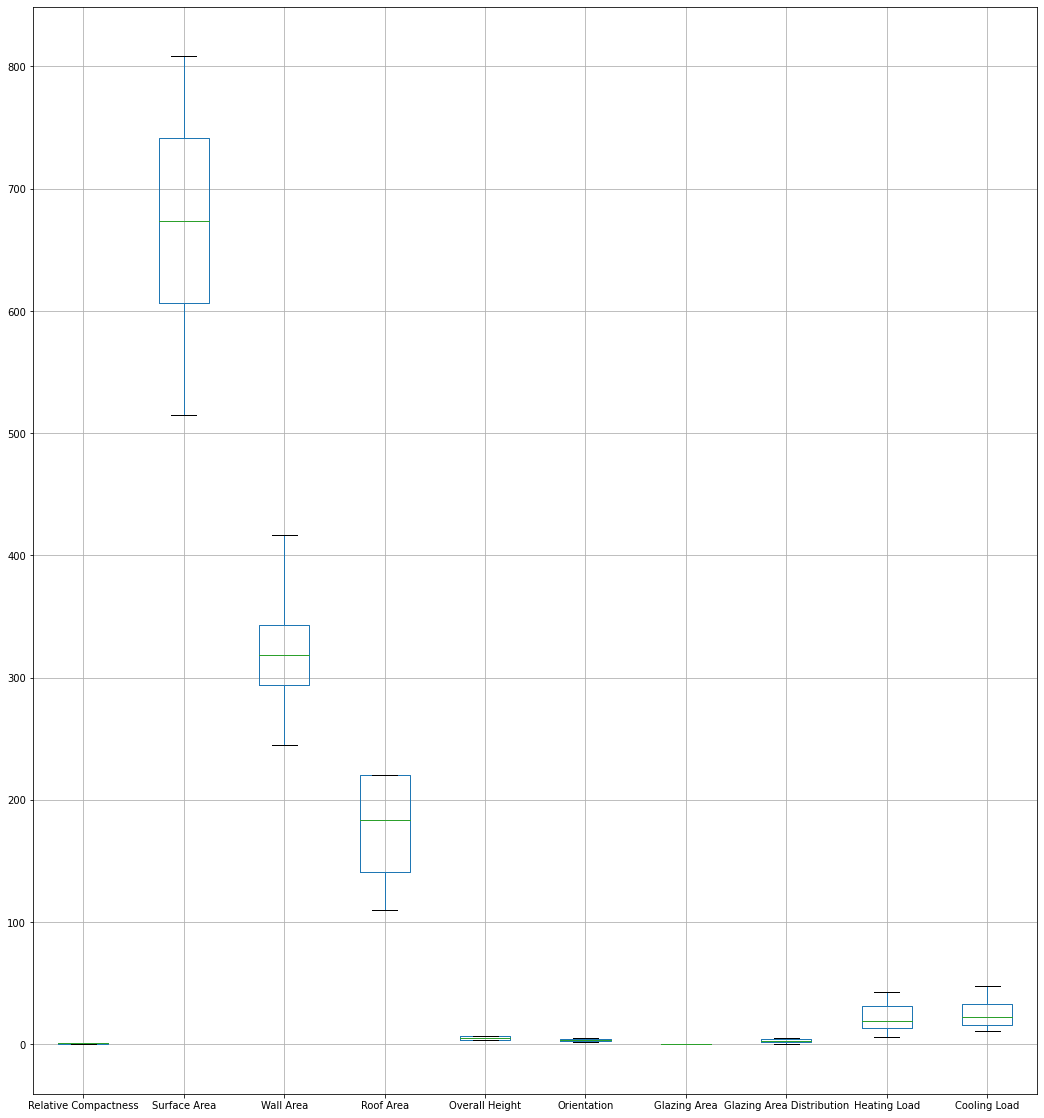

In [80]:
plt.figure(figsize=(18,20))
df.boxplot()
plt.show()

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Relative Compactness'>

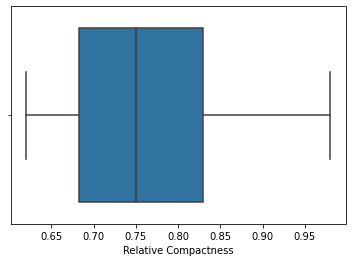

In [81]:
sns.boxplot(df['Relative Compactness'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Surface Area'>

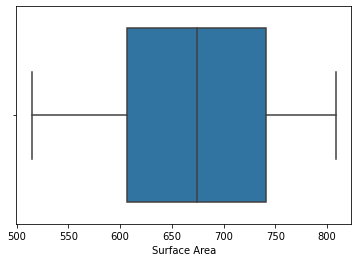

In [82]:
sns.boxplot(df['Surface Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Wall Area'>

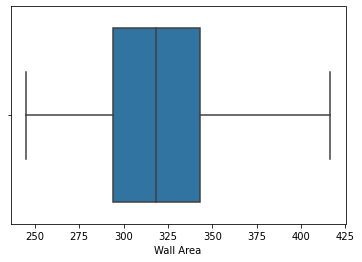

In [83]:
sns.boxplot(df['Wall Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Roof Area'>

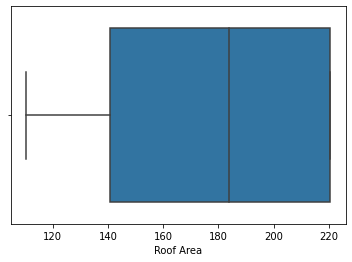

In [84]:
sns.boxplot(df['Roof Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Overall Height'>

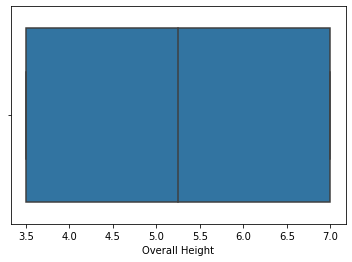

In [85]:
sns.boxplot(df['Overall Height'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Orientation'>

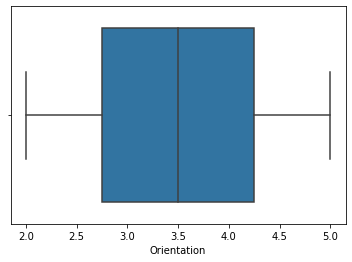

In [86]:
sns.boxplot(df['Orientation'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glazing Area'>

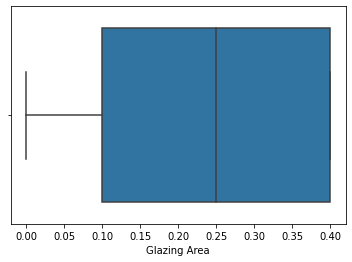

In [87]:
sns.boxplot(df['Glazing Area'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Glazing Area Distribution'>

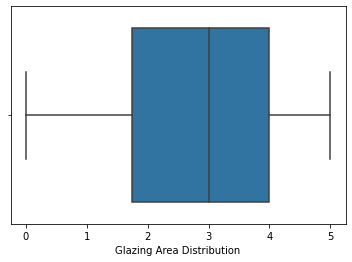

In [88]:
sns.boxplot(df['Glazing Area Distribution'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Heating Load'>

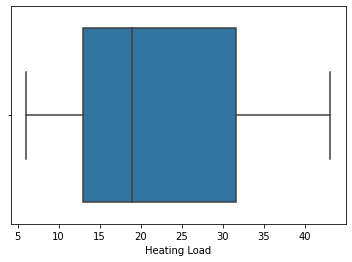

In [89]:
sns.boxplot(df['Heating Load'])

d:\Energy Efficiency ML\Energy-Efficiency-ML-Project\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cooling Load'>

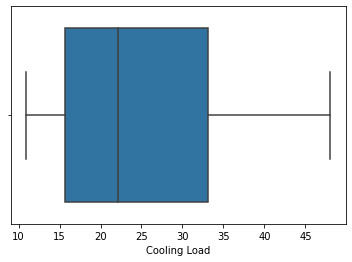

In [90]:
sns.boxplot(df['Cooling Load'])

##### Observation: From the above Box Plots we can derive the conclusion that there are no outliers in our dataset

##### Checking the relationship of independent features with output Heating and Cooling load, also the correlation between the independent features

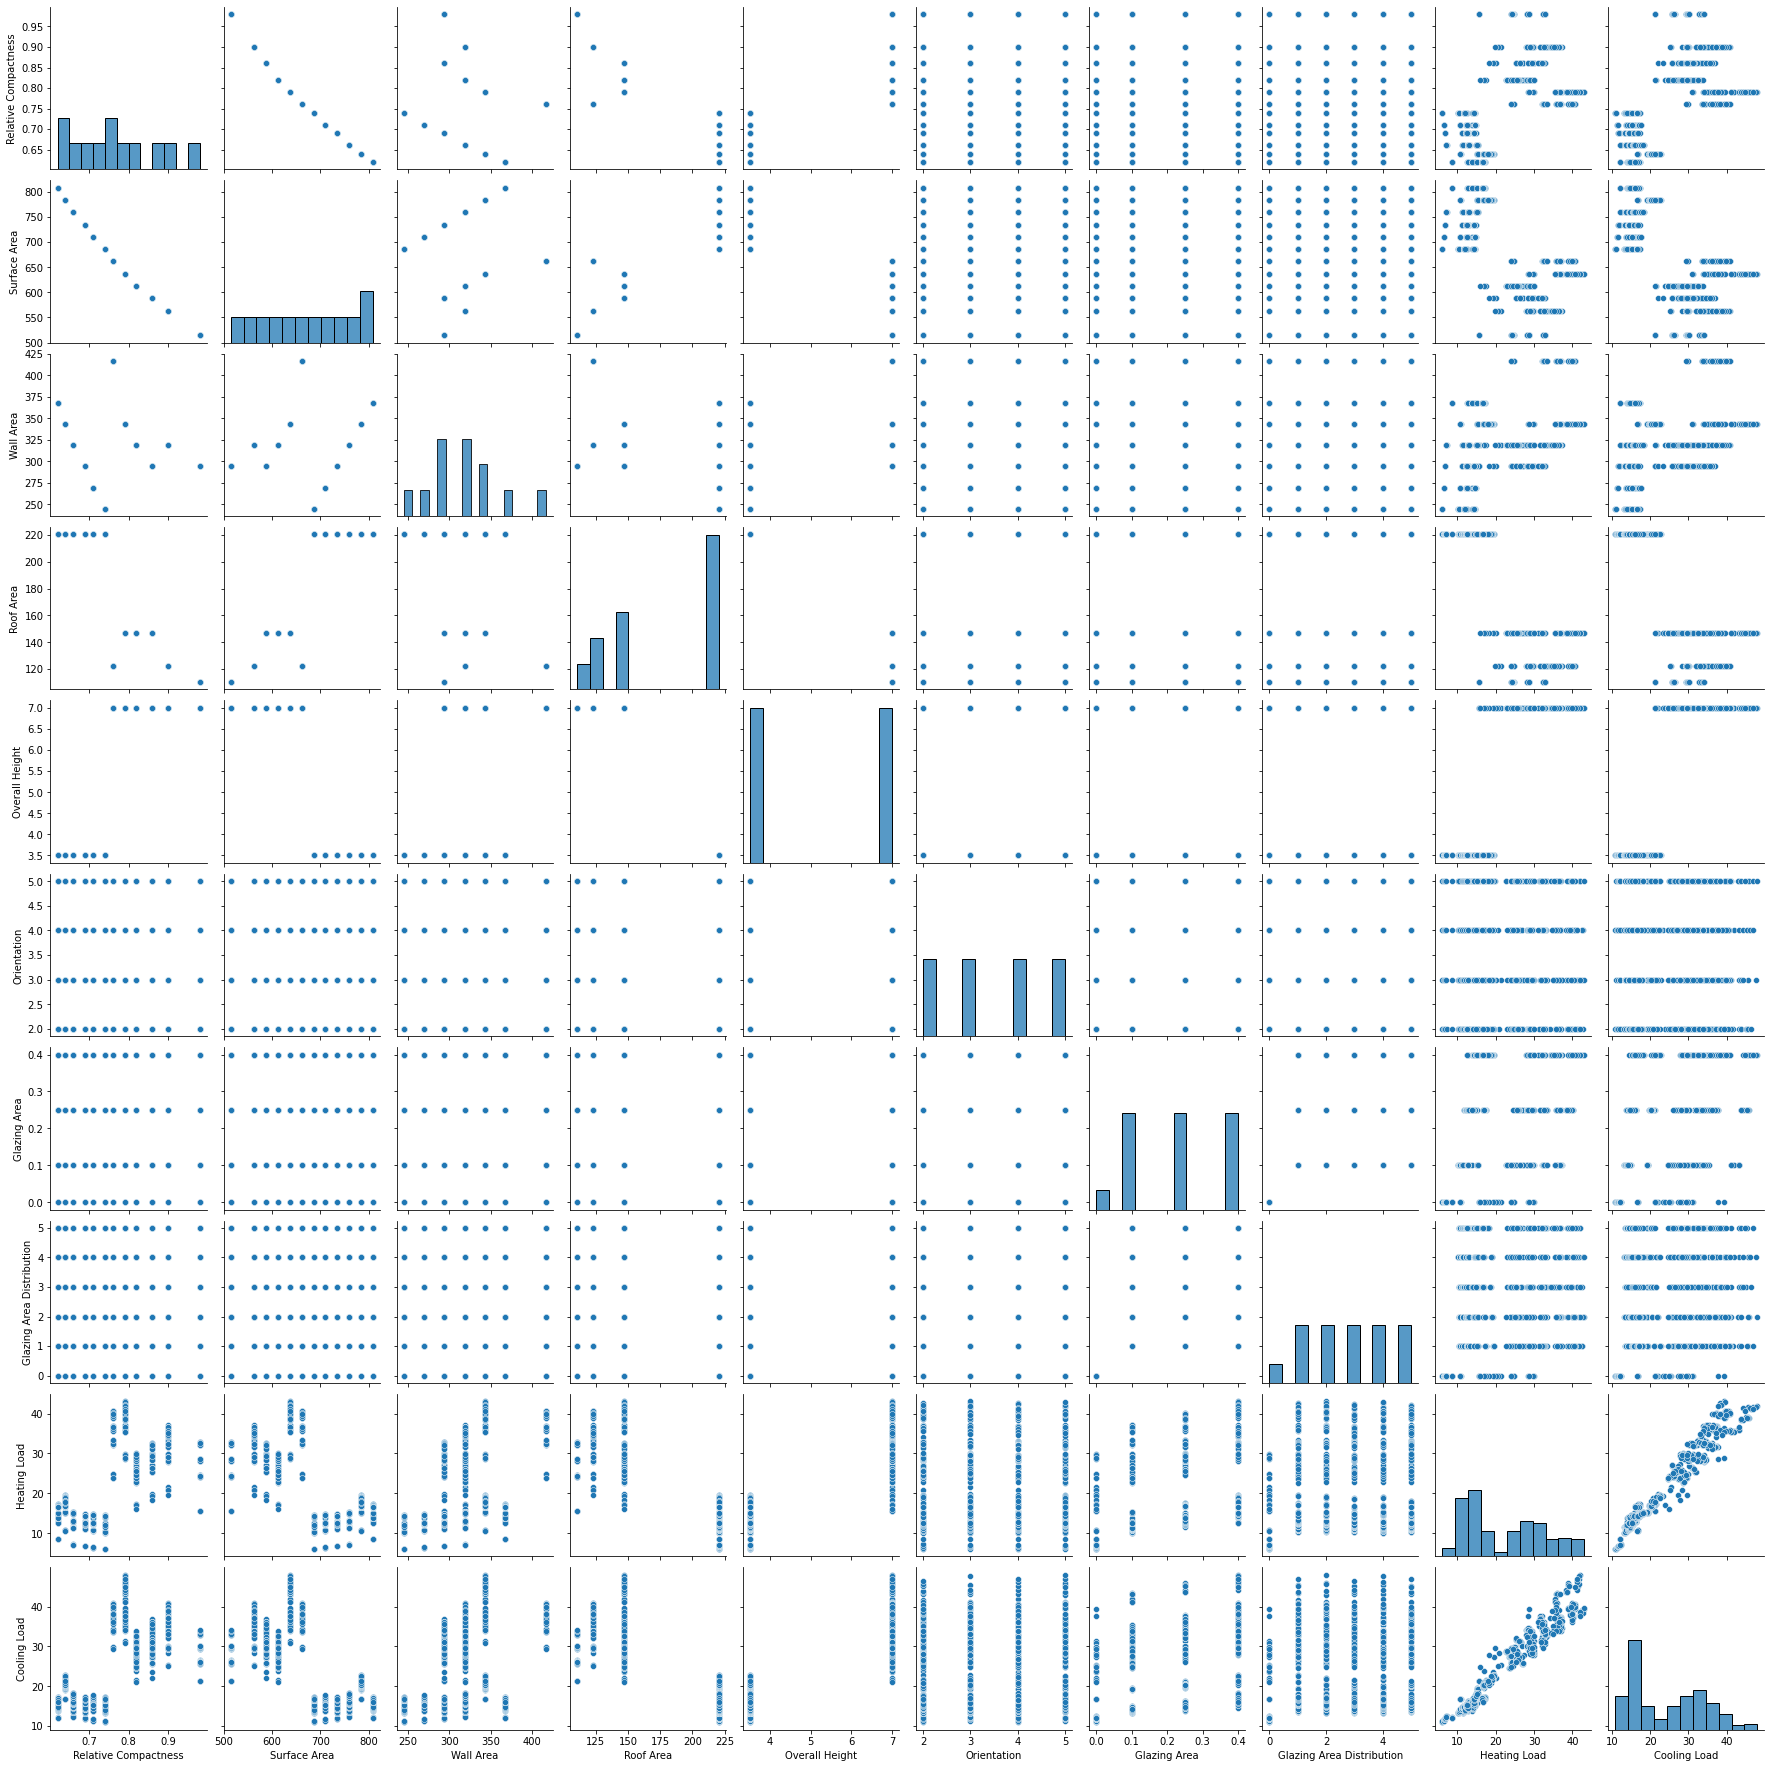

In [91]:
sns.pairplot(df)

<AxesSubplot:ylabel='Frequency'>

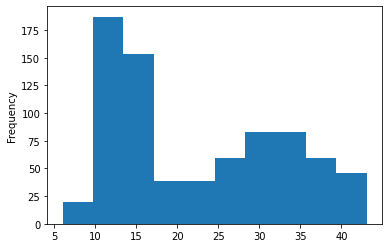

In [93]:
df['Heating Load'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

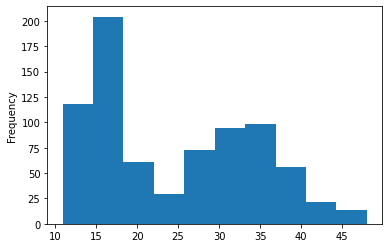

In [101]:
df['Cooling Load'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

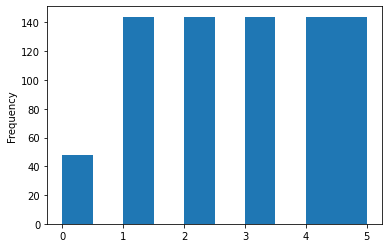

In [95]:
df['Glazing Area Distribution'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

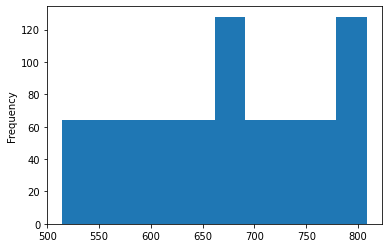

In [96]:
df['Surface Area'].plot(kind="hist")

<AxesSubplot:>

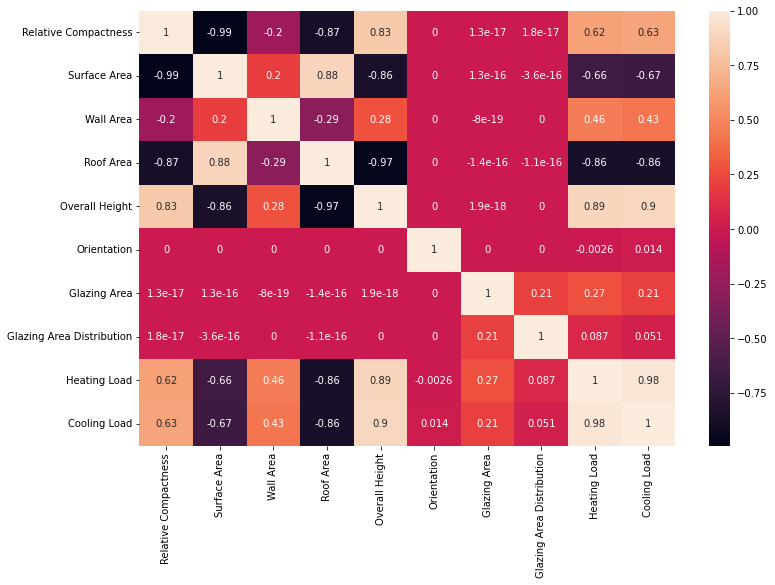

In [97]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True)

Observation:
1. From the above heatmap it is evident that Relative Compactness and Surface Area have negative correlation of 0.99
2. The Output Features Heating and Cooling Load is also having a correlation of 0.98
3. No other features have correlation more than 0.95
Hence, as the dataset is very small we will not drop any of the columns (Relative Compactness and Surface Area)

#### Train Test Split with StartifiedShuffleSplit to have the same kind of Distribution in train and test datasets

In [99]:
df.describe()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


<AxesSubplot:xlabel='Relative Compactness', ylabel='Count'>

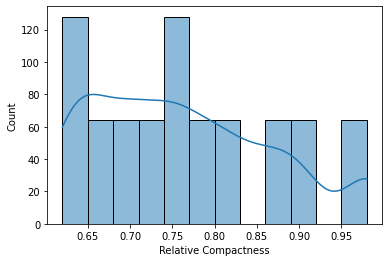

In [103]:
sns.histplot(df['Relative Compactness'],kde=True)

<AxesSubplot:xlabel='Surface Area', ylabel='Count'>

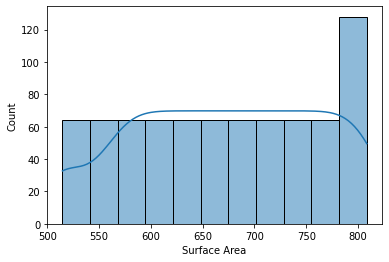

In [102]:
sns.histplot(df['Surface Area'],kde=True)

#### From the above statistical information we have Surface Area holding the max values so we choose the group category for StartifiedShuffleSplit based on Surface Area into 5bins labelled as 1,2,3,4,5 to have our train test split 

In [105]:
df["surface_area_cat"] = pd.cut(
                df["Surface Area"],
                bins=[500.0,550.0,600.0,700.0,800.0,np.inf],
                labels = [1,2,3,4,5]
)

In [106]:
from sklearn.model_selection import StratifiedShuffleSplit

In [116]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(df,df["surface_area_cat"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

In [117]:
train_set

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,surface_area_cat
327,0.66,759.5,318.5,220.50,3.5,5,0.25,1,13.18,16.19,4
239,0.62,808.5,367.5,220.50,3.5,5,0.10,4,13.00,14.47,5
351,0.82,612.5,318.5,147.00,7.0,5,0.25,2,24.94,29.88,3
525,0.62,808.5,367.5,220.50,3.5,3,0.25,5,13.99,14.61,5
228,0.66,759.5,318.5,220.50,3.5,2,0.10,4,11.44,14.86,4
...,...,...,...,...,...,...,...,...,...,...,...
176,0.69,735.0,294.0,220.50,3.5,2,0.10,3,11.22,14.44,4
717,0.62,808.5,367.5,220.50,3.5,3,0.40,4,16.90,16.79,5
48,0.98,514.5,294.0,110.25,7.0,2,0.10,1,24.58,26.47,1
509,0.71,710.5,269.5,220.50,3.5,3,0.25,5,12.19,14.71,4


In [119]:
train_set.shape

(614, 11)

In [120]:
test_set

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load,surface_area_cat
477,0.62,808.5,367.5,220.50,3.5,3,0.25,4,14.61,15.56,5
404,0.76,661.5,416.5,122.50,7.0,2,0.25,3,35.99,36.07,3
194,0.98,514.5,294.0,110.25,7.0,4,0.10,4,24.04,26.18,1
606,0.71,710.5,269.5,220.50,3.5,4,0.40,2,14.40,17.27,4
570,0.64,784.0,343.0,220.50,3.5,4,0.40,1,19.48,22.72,4
...,...,...,...,...,...,...,...,...,...,...,...
250,0.86,588.0,294.0,147.00,7.0,4,0.10,5,25.36,32.04,2
224,0.69,735.0,294.0,220.50,3.5,2,0.10,4,11.18,14.29,4
191,0.62,808.5,367.5,220.50,3.5,5,0.10,3,12.73,13.89,5
546,0.79,637.0,343.0,147.00,7.0,4,0.40,1,42.50,38.35,3


In [121]:
test_set.shape

(154, 11)

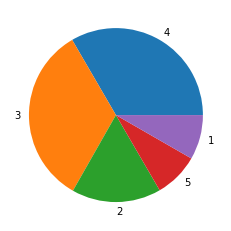

In [123]:
plt.pie(train_set.surface_area_cat.value_counts(),labels=train_set.surface_area_cat.value_counts().index)
plt.show()

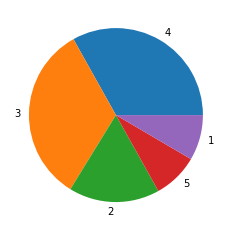

In [124]:
plt.pie(test_set.surface_area_cat.value_counts(),labels=test_set.surface_area_cat.value_counts().index)
plt.show()